# Spaceship Titanic Survival Prediction

## ToDo
- [ ] Prepare Notebook
- [ ] Exploratory Data Analysis
- [ ] Data Preprocessing
- [ ] Training Model
- [ ] Evaluating Model

### Prepare Notebook

In [29]:
# Import Pacakages

import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.color_palette("pastel")
plt.style.use(["seaborn-darkgrid"])
plt.rcParams["figure.figsize"] = (12, 9)
plt.rcParams["font.family"] = "DejaVu Sans"

import warnings
warnings.filterwarnings('ignore')

from core import downloadDataset

In [3]:
# Download Dataset

DATA_URL = 'https://www.kaggle.com/competitions/spaceship-titanic/data'

downloadDataset(url = DATA_URL, datasetName = 'spaceship-titanic')

100%|██████████| 299k/299k [00:00<00:00, 2.64MB/s]


Extracting archive ./dataset/spaceship-titanic/spaceship-titanic.zip to ./dataset/spaceship-titanic


In [4]:
# Load Dataset

train_df = pd.read_csv('./dataset/spaceship-titanic/train.csv')
test_df = pd.read_csv('./dataset/spaceship-titanic/test.csv')
sample_df = pd.read_csv('./dataset/spaceship-titanic/sample_submission.csv')

### Exploratory Data Analysis

In [6]:
train_df.head(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False


In [9]:
train_df.shape

(8693, 14)

In [10]:
train_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


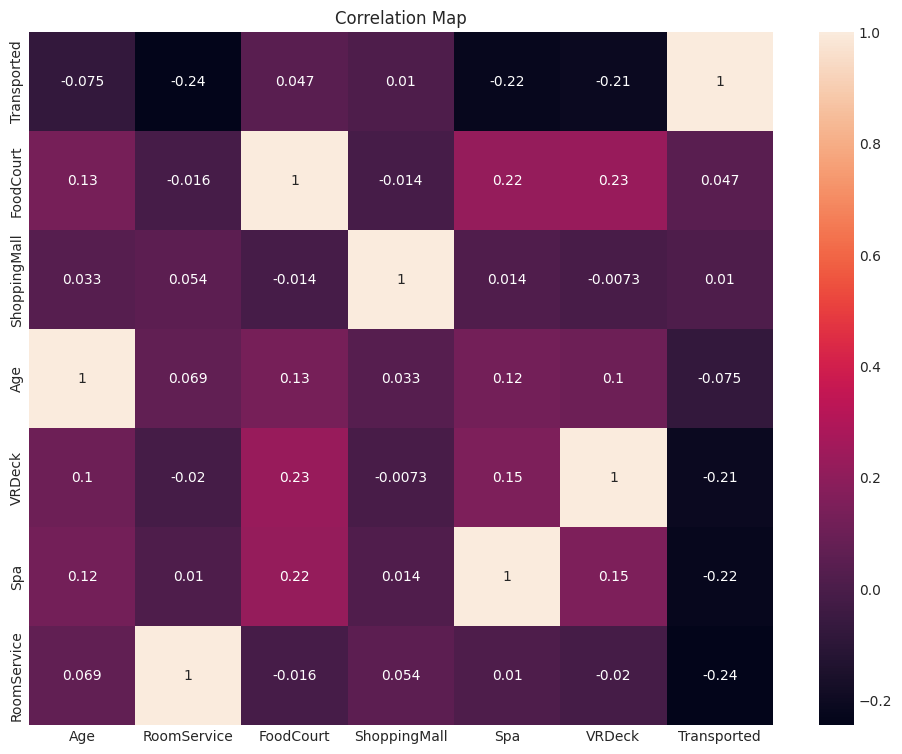

In [30]:
sns.heatmap(train_df.corr().sort_values(by = 'Transported', ascending = False), annot = True)
plt.title("Correlation Map")
plt.show()

`FoodCourt` correlates more than any other feature

In [24]:
train_df.head(4)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False


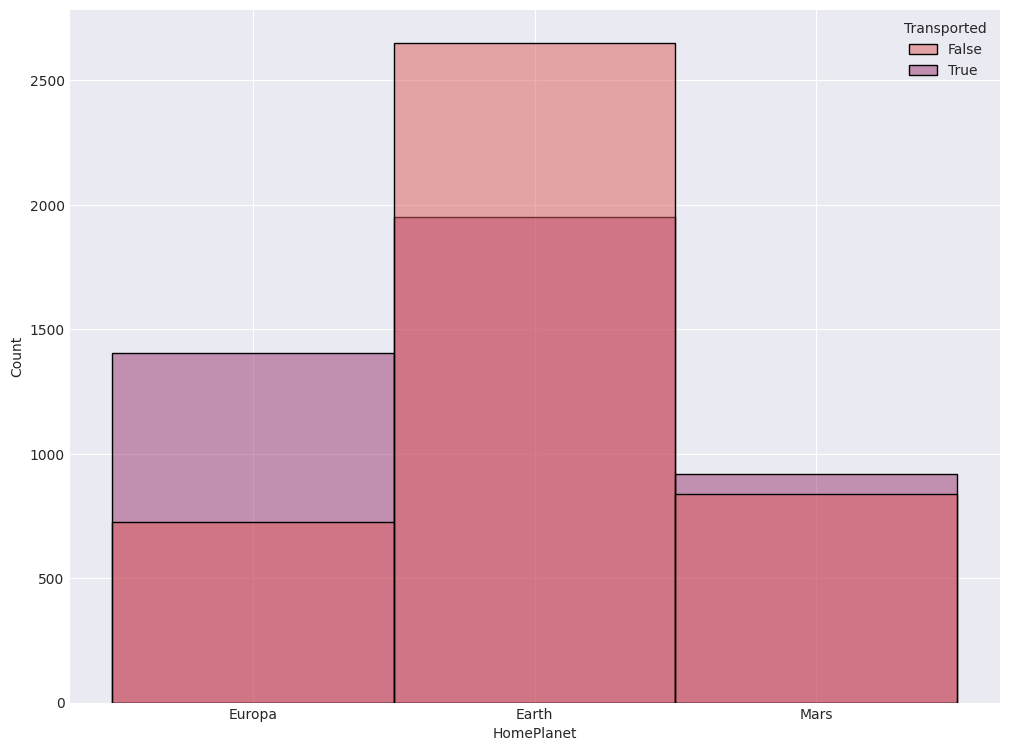

In [45]:
sns.histplot(
    data = train_df,
    x = 'HomePlanet',
    hue = 'Transported',
    legend = True,
    palette = "flare"
)
plt.show()

In [50]:
train_df.Transported.value_counts()[1] / train_df.shape[0]

0.5036236051995858

In [48]:
train_df.HomePlanet.value_counts()[1] / train_df.shape[0]

0.24513976762912687

In [47]:
train_df.HomePlanet.loc[train_df.Transported == True].value_counts()[1] / train_df.shape[0]

0.16150926032439894

Only `16 %` from Earth Survived